In [2]:
%run ../lib/helper.py
%run ../lib/graph.py
%run ../lib/graph_edge_factory.py
%run ../lib/plot.py
%run ../lib/routing_simulation.py
%run ../lib/routing_algorithms.py
%run ../lib/logger.py
%run ../lib/parse_from_log.py
%run ../lib/shortest_path.py

In [3]:
initial_knowledge_results = []
initial_knowledge_errors = []
samples = 1000
max_dth = 16
start = time.time()
for dth in range(1, 5):
    threshold = 2 ** dth
    power_law_results = []
    for sampling_power_law in range(10):
        factory = graph_edge_factory.VirtualEdgeFactory(distance_threshold=threshold, max_distance_threshold=max_dth)
        graph_edges = factory.generate_random_power_law_graph_edges()
        arguments = {'algorithm': routing_algorithms.initial_knowledge_init, 'graph_edges': graph_edges,
                     'link_prediction': False, 'exponential_scale': True}
        local_result, errors, length = routing_simulation.run_algorithm_for_graphs(50, samples, arguments)
        power_law_results.append(local_result)
    temp = [list(zip(*item)) for item in list(zip(*power_law_results))]
    topology_result = [helper.map_tuple_gen(np.mean, x) for x in temp]
    initial_knowledge_results.append(topology_result)
    initial_knowledge_errors.append(errors)
end = time.time()
write_results_to_file(initial_knowledge_results, 'results/initial_knowledge_random_k1_graph_dth_' + str(threshold), '' , (end - start))
write_results_to_file(initial_knowledge_errors, 'errors/initial_knowledge_random_k1_graph_errors_maxdth_' + str(max_dth), '' , (end - start))
plot.plot_results(initial_knowledge_results, 'initial_knowledge_random_k1_graph_dth_' + str(max_dth) + str(end - start),
             save_tikz=True)
plot.plot_results(initial_knowledge_results, 'initial_knowledge_random_k1_graph_dth_' + str(max_dth) + str(end - start),
             save_tikz=False)

Traceback (most recent call last):
  File "/home/antal/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-1671a2f4b8b7>", line 23, in <module>
    plot.plot_results(initial_knowledge_results, 'initial_knowledge_random_k1_graph_dth_' + str(max_dth) + str(end - start),
NameError: name 'plot' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/antal/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2040, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/antal/anaconda3/lib/python3.7/site-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_g

NameError: name 'plot' is not defined

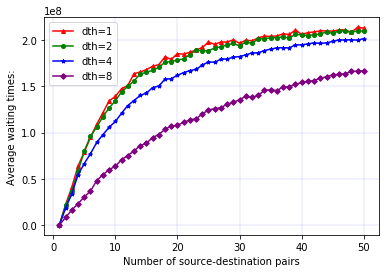

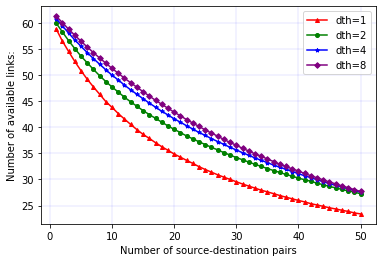

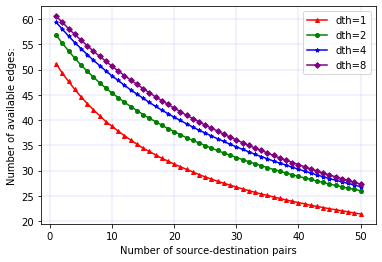

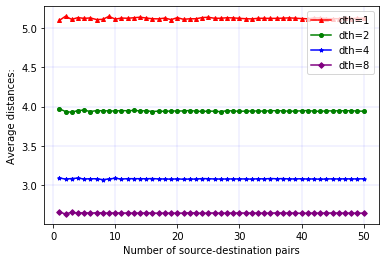

In [5]:
plot_results(initial_knowledge_results, 'initial_knowledge_random_k1_graph_dth_' + str(max_dth) + str(end - start),
             save_tikz=False)

In [14]:
plot_results(initial_knowledge_results, 'initial_knowledge_random_k1_graph_dth_' + str(max_dth) + str(end-start),
                  save_tikz = True)

<Figure size 432x288 with 0 Axes>

# Global knowledge

IndexError: list index out of range

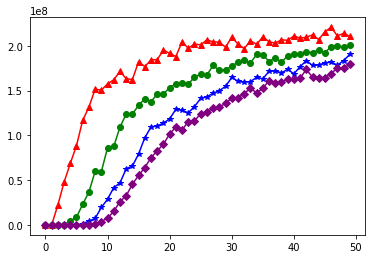

In [5]:
global_knowledge_results = []
initial_knowledge_errors = []
samples = 1000
max_dth = 16
propagation_radius = 0
start = time.time()

for dth in range(0, max_dth):
    threshold = 2 ** dth
    factory = VirtualEdgeFactory(distance_threshold=threshold, max_distance_threshold=max_dth)
    graph_edges = factory.generate_deterministic_graph_edges()
    arguments = {'algorithm': routing_algorithms.global_knowledge_init, 'graph_edges': graph_edges,
                 'link_prediction': False, 'exponential_scale': True}
    topology_result, errors, length = routing_simulation.run_algorithm_for_graphs(50, samples, arguments)
    global_knowledge_results.append(topology_result)
    initial_knowledge_errors.append(errors)
end = time.time()
write_results_to_file(global_knowledge_results, 'results/global_knowledge_deterministic_graph_dth_' + str(threshold), '' , (end - start))
write_results_to_file(initial_knowledge_errors, 'errors/global_knowledge_deterministic_graph_dth_errors_maxdth_' + str(max_dth), '' , (end - start))
plot_results(global_knowledge_results, 'global_knowledge_deterministic_graph_dth_' + str(max_dth) + str(end-start),
                  save_tikz = True)

In [1]:
res = [([8.114, 12.8775, 22109149.719, 47683679.431, 68636726.0254, 88536266.41933332, 116807982.27485715, 131539524.2225, 151633253.82455555, 150576332.22990003, 157528071.61927274, 162161059.6875, 171475725.7529231, 163425771.97207144, 162394809.78153333, 182293938.193125, 176914377.28729412, 184336605.36666664, 184640070.9888421, 195389326.60165, 191645196.08733335, 188093686.8038636, 204500782.61456525, 197377389.373, 202118405.91315997, 201138582.06519228, 206812869.9676667, 204476074.78417858, 204189981.47779313, 198504667.43046668, 209781634.35693547, 202150439.816875, 196977270.3158485, 205636017.20879412, 201804837.9927143, 210044520.9248611, 204621166.69772974, 203009214.0910263, 206875646.65976924, 206194590.697725, 211038934.52026832, 208710634.8751905, 209687990.1043721, 212320324.22059092, 207092105.91993335, 215841183.14447826, 220846766.77668086, 211199104.5510625, 214020403.29881635, 210618216.27802],[53.886, 48.66, 44.772333333333336, 41.20875, 38.667, 36.061, 33.162571428571425, 30.942375, 29.137888888888888, 27.3034, 25.597636363636365, 24.19425, 22.808692307692308, 21.872642857142854, 20.502333333333336, 19.5500625, 18.578470588235295, 17.528722222222218, 16.902947368421053, 16.23175, 15.307761904761904, 14.86018181818182, 14.044652173913043, 13.5135, 13.06916, 12.42853846153846, 11.964481481481481, 11.825607142857141, 11.338827586206897, 11.038266666666667, 10.579677419354839, 10.2125625, 9.939060606060606, 9.716852941176471, 9.404342857142858, 9.380055555555554, 8.831837837837838, 8.656736842105264, 8.417128205128204, 8.1325, 8.025780487804878, 7.944333333333334, 7.636581395348838, 7.439340909090909, 7.398555555555555, 7.089804347826087, 6.98595744680851, 6.8663125, 6.789938775510205, 6.6396],[27.939, 25.316, 23.399666666666665, 21.567, 20.3212, 18.987666666666666, 17.54942857142857, 16.444875, 15.539666666666667, 14.615400000000001, 13.768818181818181, 13.057166666666665, 12.34130769230769, 11.842714285714287, 11.156466666666667, 10.6339375, 10.138470588235293, 9.578111111111111, 9.266157894736843, 8.888650000000002, 8.371714285714287, 8.168136363636362, 7.714565217391304, 7.426416666666667, 7.18916, 6.844307692307693, 6.605259259259259, 6.512178571428572, 6.252620689655172, 6.0895, 5.836870967741936, 5.62825, 5.47669696969697, 5.364058823529412, 5.178685714285714, 5.164777777777778, 4.86618918918919, 4.773578947368422, 4.639025641025642, 4.491725000000001, 4.423560975609756, 4.378571428571428, 4.208186046511628, 4.101772727272727, 4.080577777777777, 3.914152173913043, 3.862170212765957, 3.7904583333333335, 3.74165306122449, 3.6579200000000003],[8.114, 9.4525, 9.308666666666666, 9.2165, 8.943200000000001, 8.770666666666665, 8.903142857142857, 8.84975, 8.781555555555554, 8.783299999999999, 8.698090909090908, 8.664833333333334, 8.642615384615384, 8.489142857142857, 8.579600000000001, 8.5780625, 8.487529411764706, 8.51388888888889, 8.495631578947366, 8.48875, 8.48952380952381, 8.452954545454546, 8.506521739130434, 8.492208333333332, 8.452, 8.45623076923077, 8.458037037037036, 8.405607142857143, 8.398379310344826, 8.38, 8.423967741935483, 8.399375, 8.389909090909091, 8.36220588235294, 8.373171428571428, 8.350416666666668, 8.404351351351352, 8.339236842105263, 8.34923076923077, 8.402575, 8.37019512195122, 8.316380952380952, 8.354093023255812, 8.345659090909091, 8.349200000000002, 8.366369565217392, 8.369702127659576, 8.354708333333333, 8.345061224489797, 8.33176]),([4.606, 4.9335, 5.243666666666666, 72.037, 4603556.2318, 8537733.748666666, 23072564.419428572, 36738682.26575, 59815042.66944444, 59380644.2903, 86227543.02027273, 87637108.82208334, 109215798.07176922, 123916473.90414286, 124045831.25973333, 133453764.0618125, 141212113.24452943, 137876035.82822222, 146014250.87884215, 146253063.90065002, 153328004.8118095, 157660236.005, 158380685.5036522, 157225055.8458333, 165229311.5672, 168457325.61384615, 167637737.6359259, 178122184.6217143, 172819733.43355173, 172873180.4463, 177689683.7458387, 181487876.90521875, 184112691.9898182, 180809984.3382647, 190492969.87637144, 190383543.21791667, 182527585.96183783, 186829680.1713421, 181792004.65669233, 189040638.452975, 190847542.54365855, 190813989.2854524, 193422706.75913957, 192487362.43170452, 195462883.03857777, 192574062.41108695, 199294967.244, 200108572.256875, 198549212.93202043, 201079901.78653997],[57.394, 54.6765, 52.15033333333333, 49.186, 46.1414, 43.3145, 40.81242857142857, 38.644, 35.79533333333333, 33.7845, 31.61072727272727, 29.89025, 28.16592307692308, 26.57042857142857, 25.2778, 23.840625, 22.619058823529414, 21.730666666666664, 20.630473684210525, 19.78825, 18.783952380952382, 17.9255, 17.116956521739127, 16.58745833333333, 15.89124, 15.330576923076922, 14.640407407407409, 14.220678571428573, 13.676793103448276, 13.475566666666666, 13.004096774193549, 12.4636875, 12.309727272727272, 11.734941176470587, 11.42562857142857, 11.143638888888889, 10.84608108108108, 10.650894736842105, 10.297692307692309, 9.98465, 9.690634146341464, 9.42502380952381, 9.332093023255814, 9.096931818181819, 8.887555555555554, 8.663630434782608, 8.554297872340426, 8.379229166666669, 8.350020408163266, 7.964219999999999],[45.206, 43.3875, 41.6, 39.538, 37.2468, 35.172, 33.25328571428571, 31.55925, 29.356777777777776, 27.811700000000005, 26.06709090909091, 24.71575, 23.296846153846158, 21.996428571428574, 20.956799999999998, 19.8313125, 18.809176470588238, 18.034833333333335, 17.139368421052634, 16.467200000000002, 15.644904761904762, 14.955454545454545, 14.265260869565216, 13.840458333333332, 13.24088, 12.80123076923077, 12.222740740740742, 11.864357142857143, 11.42306896551724, 11.241433333333333, 10.841064516129032, 10.4049375, 10.260515151515152, 9.760970588235294, 9.531057142857142, 9.297555555555554, 9.039864864864866, 8.871973684210527, 8.58302564102564, 8.348925000000001, 8.095682926829268, 7.868833333333333, 7.792790697674418, 7.602181818181818, 7.4204, 7.234, 7.138361702127661, 6.9894375, 6.951836734693877, 6.64032],[4.606, 4.9335, 5.105, 5.4655, 5.759600000000001, 5.832833333333334, 5.87742857142857, 5.798875, 5.898333333333333, 5.8426, 5.880727272727272, 5.803666666666666, 5.773461538461539, 5.759714285714287, 5.683666666666666, 5.67075, 5.632529411764707, 5.561222222222222, 5.543368421052632, 5.49145, 5.465857142857143, 5.438272727272727, 5.413608695652174, 5.370625, 5.33112, 5.335269230769231, 5.312, 5.2905, 5.265724137931034, 5.2182, 5.214612903225807, 5.19659375, 5.174242424242424, 5.187470588235294, 5.162628571428572, 5.139805555555555, 5.11527027027027, 5.096921052631579, 5.08374358974359, 5.090775, 5.085121951219512, 5.072357142857143, 5.054976744186047, 5.046886363636364, 5.022733333333334, 5.020652173913043, 5.019808510638298, 4.991104166666667, 4.993387755102042, 5.00676]),([3.304, 3.3735, 3.451, 3.54125, 3.9122, 4.5765, 1429215.232, 4175298.241, 7190953.735222222, 19508907.5899, 28644568.585636362, 41689356.08291666, 46799936.873153836, 62747189.27350001, 65753689.01979999, 79291827.3606875, 97372233.47241177, 109402298.99155557, 110752213.33657895, 113541669.30455, 118621100.41228572, 129130772.87536363, 127854489.025, 125297608.796125, 132195807.4458, 141306775.10692307, 143254060.81896296, 146951515.65389287, 149847338.06724137, 154868035.10603333, 164745113.2675161, 160455615.9431875, 159425879.95545456, 160158249.02470586, 164709524.84711426, 163320495.17477778, 171563184.4967838, 172106165.10757896, 169854171.48884612, 173899751.694875, 168788779.30763415, 176724511.11685714, 183567691.27409303, 178108986.65118182, 178710660.6661778, 180920145.1656739, 182130454.47904253, 178378786.15139586, 183548170.7942857, 190484525.34496],[58.696, 56.987, 55.23233333333333, 53.50475, 51.2532, 49.18266666666666, 46.76728571428571, 44.7235, 42.61888888888889, 40.13889999999999, 38.130545454545455, 35.911583333333326, 34.209923076923076, 32.25257142857143, 30.714133333333333, 29.1501875, 27.36511764705882, 26.038, 24.802210526315786, 23.921300000000002, 22.680619047619047, 21.823954545454544, 21.021, 20.067, 19.18448, 18.614192307692306, 18.115629629629627, 17.277392857142853, 16.814241379310346, 16.14026666666667, 15.690870967741935, 15.17671875, 14.729424242424244, 14.36029411764706, 13.734428571428571, 13.31711111111111, 13.132324324324323, 12.733763157894737, 12.388923076923078, 12.088025, 11.815024390243904, 11.456547619047619, 11.224255813953489, 11.093909090909092, 10.749466666666667, 10.583695652173912, 10.265787234042552, 10.134166666666665, 9.926734693877552, 9.6675],[53.471, 52.149, 50.754, 49.30175, 47.467400000000005, 45.642333333333326, 43.58457142857143, 41.75875, 39.86911111111111, 37.64860000000001, 35.782181818181826, 33.79675, 32.21261538461539, 30.38657142857143, 28.948066666666666, 27.479125, 25.83229411764706, 24.60711111111111, 23.417894736842108, 22.5708, 21.430333333333333, 20.590954545454544, 19.831652173913042, 18.93825, 18.11844, 17.59269230769231, 17.118518518518517, 16.30925, 15.867068965517241, 15.250300000000001, 14.831806451612904, 14.33653125, 13.914151515151516, 13.5685, 12.970628571428572, 12.580416666666668, 12.400783783783783, 12.027026315789474, 11.708717948717949, 11.412475, 11.158463414634145, 10.826238095238095, 10.595162790697675, 10.46634090909091, 10.153222222222222, 9.996934782608696, 9.691340425531914, 9.563395833333335, 9.380122448979591, 9.13488],[3.304, 3.3735, 3.442, 3.52475, 3.7736, 3.9620000000000006, 4.245714285714286, 4.363875, 4.446, 4.610399999999999, 4.670272727272727, 4.718000000000001, 4.725153846153845, 4.756357142857143, 4.716333333333333, 4.692875, 4.694411764705882, 4.674277777777777, 4.616210526315789, 4.5525, 4.5373809523809525, 4.486545454545455, 4.426086956521739, 4.393166666666667, 4.35924, 4.314307692307692, 4.267777777777777, 4.260642857142858, 4.212068965517241, 4.191133333333333, 4.1535806451612896, 4.1263125, 4.101727272727273, 4.081235294117647, 4.067285714285715, 4.042027777777778, 4.022918918918919, 4.003315789473684, 3.9754358974358976, 3.965625, 3.94309756097561, 3.935380952380952, 3.9120697674418605, 3.900227272727273, 3.8888000000000003, 3.869826086956522, 3.8623829787234043, 3.835375, 3.83395918367347, 3.8346400000000003]),([2.734, 2.811, 2.884, 2.976, 3.0305999999999997, 3.166, 3.480714285714286, 35950.281375, 1106376.6694444444, 3724522.0286999997, 7538310.642818182, 15146916.36975, 26048223.157846153, 32546957.47042857, 45414781.52666667, 55264052.9605, 64037218.17594118, 75192304.02827777, 82794082.3508421, 90082911.6969, 101564430.22123808, 109441453.01, 106261106.02595651, 115352326.58129166, 116155298.66795999, 124436957.2683846, 126223838.78588888, 130612293.3712143, 132055895.45703448, 135651399.43116665, 141653348.2356129, 142264777.171625, 146536146.22821212, 152936532.07473528, 147553348.22320002, 152643877.10208333, 161136987.1957027, 158335355.87521052, 159525393.35017946, 162902775.295025, 163116047.02590245, 164021622.385, 173658623.42632556, 165030180.03929546, 164611571.15788892, 164607815.6108261, 169159379.72506383, 175349276.10654166, 175594290.89646938, 179255057.86184004],[59.266, 57.814, 56.27866666666667, 54.7545, 53.2202, 51.60366666666667, 49.85385714285714, 48.11475, 46.092, 44.061699999999995, 42.06136363636363, 40.05483333333333, 37.939076923076925, 36.28928571428571, 34.31573333333333, 32.55775, 31.018823529411765, 29.69188888888889, 28.08478947368421, 26.70825, 25.89147619047619, 24.725227272727274, 23.683695652173913, 22.667916666666663, 21.74508, 20.945653846153842, 20.352851851851852, 19.413285714285717, 18.937896551724137, 18.31883333333333, 17.72148387096774, 17.0549375, 16.68590909090909, 16.02770588235294, 15.672657142857144, 15.117944444444444, 14.755027027027026, 14.389, 14.08148717948718, 13.658175, 13.33768292682927, 12.982261904761904, 12.680069767441859, 12.536522727272727, 12.202288888888889, 11.909369565217393, 11.638340425531915, 11.321270833333333, 11.126755102040818, 10.911299999999999],[57.568, 56.2335, 54.84266666666667, 53.422, 51.996199999999995, 50.52283333333334, 48.83657142857143, 47.184125, 45.22811111111111, 43.269, 41.31136363636363, 39.39891666666667, 37.33592307692308, 35.70364285714285, 33.780800000000006, 32.055, 30.553470588235292, 29.228277777777777, 27.65557894736842, 26.30505, 25.498047619047618, 24.355363636363634, 23.320347826086955, 22.333833333333335, 21.41996, 20.629, 20.05377777777778, 19.124107142857145, 18.655068965517238, 18.043233333333333, 17.459548387096774, 16.8010625, 16.426757575757577, 15.78464705882353, 15.436657142857142, 14.895805555555555, 14.538837837837837, 14.176763157894737, 13.873, 13.44975, 13.136512195121952, 12.789785714285713, 12.48967441860465, 12.347954545454545, 12.022422222222223, 11.729152173913043, 11.46572340425532, 11.1554375, 10.962571428571428, 10.75116],[2.734, 2.811, 2.881, 2.95575, 3.0071999999999997, 3.101333333333333, 3.2717142857142854, 3.397875, 3.588222222222222, 3.7992000000000004, 3.940545454545455, 4.077583333333333, 4.215461538461539, 4.230071428571429, 4.3305333333333325, 4.350375, 4.345235294117646, 4.305055555555555, 4.320526315789473, 4.2801, 4.236142857142858, 4.192318181818182, 4.165869565217391, 4.128791666666667, 4.09684, 4.059807692307692, 4.016074074074075, 3.995214285714286, 3.945344827586207, 3.9224, 3.884225806451613, 3.857375, 3.821909090909091, 3.8125294117647064, 3.7767142857142852, 3.763666666666666, 3.7463783783783784, 3.728815789473684, 3.6978974358974357, 3.6870249999999998, 3.663731707317073, 3.6442142857142854, 3.6368139534883723, 3.602340909090909, 3.5889555555555552, 3.577891304347826, 3.566276595744681, 3.5601041666666666, 3.5529183673469387, 3.5347600000000003]),([2.704, 2.787, 2.8383333333333334, 2.885, 2.9398, 3.079166666666667, 3.2752857142857144, 3.744, 666230.9587777777, 1212269.7833999998, 5253734.867454545, 14790024.25875, 22214003.943153847, 28776913.12885714, 32118427.100266665, 53430665.0678125, 62477242.086529404, 71035079.1155, 80099383.27605262, 84577179.13839999, 89646065.82161905, 96678091.31781818, 102460516.9649565, 107925328.90629166, 114056289.73420002, 121170783.7905, 118025922.25503704, 129018161.58996429, 129403350.0246207, 129845474.27693331, 135593745.27203226, 142812382.695, 142889918.3296061, 147549961.6754706, 150737505.9056857, 153957084.9951389, 152481068.98624322, 157332858.92505264, 156566716.7619231, 149724642.15, 152188192.06002438, 161844468.0384524, 165555762.21958143, 164479165.07595456, 168035502.20635557, 163942054.0865435, 165285332.37542555, 171891811.8767083, 170536923.1267551, 177424933.74006],[59.296, 57.8385, 56.404666666666664, 54.94925, 53.469199999999994, 51.852333333333334, 50.15742857142857, 48.4105, 46.55622222222222, 44.62910000000001, 42.584, 40.748, 38.75615384615384, 37.13114285714286, 35.49653333333333, 33.0938125, 31.74, 30.322499999999998, 29.02121052631579, 27.417099999999998, 26.378380952380954, 25.038636363636364, 24.147608695652174, 23.129708333333333, 22.26988, 21.44226923076923, 20.79122222222222, 19.958535714285713, 19.228344827586206, 18.7256, 18.113387096774193, 17.54690625, 17.063484848484848, 16.52379411764706, 15.851599999999998, 15.42236111111111, 15.177756756756757, 14.735394736842107, 14.225974358974359, 13.960175, 13.638439024390243, 13.322809523809525, 12.96960465116279, 12.597681818181819, 12.4572, 12.063978260869566, 11.965297872340427, 11.529020833333332, 11.361714285714287, 11.15658],[58.413, 56.9945, 55.62766666666666, 54.22825, 52.8002, 51.24733333333334, 49.61257142857143, 47.89825, 46.09377777777778, 44.198, 42.196, 40.39208333333334, 38.42053846153847, 36.812928571428564, 35.1948, 32.8200625, 31.494647058823528, 30.081111111111113, 28.793894736842105, 27.1965, 26.171761904761908, 24.84290909090909, 23.95817391304348, 22.948875, 22.0936, 21.270423076923077, 20.625740740740742, 19.79546428571428, 19.081724137931037, 18.573433333333334, 17.9696129032258, 17.40109375, 16.92293939393939, 16.393735294117647, 15.7274, 15.301055555555557, 15.058216216216216, 14.616315789473685, 14.110846153846152, 13.851875, 13.531146341463412, 13.21997619047619, 12.871, 12.499636363636364, 12.358488888888889, 11.967021739130434, 11.87148936170213, 11.435854166666667, 11.275265306122447, 11.07066],[2.704, 2.787, 2.8323333333333336, 2.873, 2.9158000000000004, 3.021166666666667, 3.139142857142857, 3.299375, 3.4415555555555555, 3.6395999999999997, 3.8124545454545453, 3.9366666666666665, 4.062461538461538, 4.090071428571428, 4.1575999999999995, 4.2853125, 4.276941176470588, 4.255111111111112, 4.248368421052632, 4.236449999999999, 4.199571428571429, 4.1875, 4.133347826086956, 4.096541666666667, 4.0632, 4.019230769230769, 3.986407407407407, 3.9673571428571432, 3.9288620689655174, 3.8907333333333334, 3.863483870967742, 3.82834375, 3.804151515151515, 3.7826176470588235, 3.7651428571428567, 3.745166666666666, 3.7190810810810806, 3.7032631578947366, 3.6898974358974357, 3.661575, 3.6518536585365853, 3.625285714285714, 3.6217209302325584, 3.5914545454545452, 3.5813999999999995, 3.573217391304348, 3.544872340425532, 3.5460416666666665, 3.535408163265306, 3.51844])]

In [8]:
print(res[4])

([2.704, 2.787, 2.8383333333333334, 2.885, 2.9398, 3.079166666666667, 3.2752857142857144, 3.744, 666230.9587777777, 1212269.7833999998, 5253734.867454545, 14790024.25875, 22214003.943153847, 28776913.12885714, 32118427.100266665, 53430665.0678125, 62477242.086529404, 71035079.1155, 80099383.27605262, 84577179.13839999, 89646065.82161905, 96678091.31781818, 102460516.9649565, 107925328.90629166, 114056289.73420002, 121170783.7905, 118025922.25503704, 129018161.58996429, 129403350.0246207, 129845474.27693331, 135593745.27203226, 142812382.695, 142889918.3296061, 147549961.6754706, 150737505.9056857, 153957084.9951389, 152481068.98624322, 157332858.92505264, 156566716.7619231, 149724642.15, 152188192.06002438, 161844468.0384524, 165555762.21958143, 164479165.07595456, 168035502.20635557, 163942054.0865435, 165285332.37542555, 171891811.8767083, 170536923.1267551, 177424933.74006], [59.296, 57.8385, 56.404666666666664, 54.94925, 53.469199999999994, 51.852333333333334, 50.15742857142857, 48

In [13]:
plot_results(res, 'global_knowledge_maxdth_' + str(16),
                  save_tikz = True)

<Figure size 432x288 with 0 Axes>